Is a user that must call-in to cancel more likely to generate at least 1 addition REBILL?

In [24]:
import pandas as pd
import csv

In [71]:
#a = pd.read_csv('transData.csv')
#b = pd.read_csv("testSamples.csv")
#b = b.dropna(axis=1)
#merged = a.merge(b, on='sample_id')
#merged.to_csv("output.csv", index=False)

I found all sample_ids of control group which had a rebill transaction

In [72]:
with open('output.csv') as csvfile:    
    output=list(csv.DictReader(csvfile))
df=pd.DataFrame(output)

m=df[df['sample_id'].notnull() & (df['transaction_type'] == "REBILL")&(df['test_group']=='0')]
z=m.groupby(['sample_id']).size().reset_index(name='counts')


In [5]:
 all_REBILLS_control=z['counts'].sum()


In [6]:
all_REBILLS_control

3756

In [19]:
all_sampleid_control=z.sample_id.nunique()


In [20]:
all_sampleid_control


941

The Control group has such a high amount of rebill transactions with only 941 users. 

In [9]:
mm=df[df['sample_id'].notnull() & (df['transaction_type'] == "REBILL")&(df['test_group']=='1')]
zz=mm.groupby(['sample_id']).size().reset_index(name='counts')


In [10]:
all_REBILLS_test=zz['counts'].sum()

In [11]:
all_REBILLS_test

3205

In [21]:
all_sampleid_test=zz.sample_id.nunique()

In [25]:
all_sampleid_test

1556

It seems that users which can cancel their subscription using a web form have less rebill transactions than control group, 
therefore the answer to the question is NO. 

Is a user that must call-in to cancel more likely to generate more revenues?

In [26]:
n=df[df['transaction_amount'].notnull()&(df['test_group']=='1')]
mean_test=n['transaction_amount'].astype(float).mean()


In [27]:
mean_test

28.23476331360791

In [29]:
c=df[df['transaction_amount'].notnull()&(df['test_group']=='0')]
mean_control=c['transaction_amount'].astype(float).mean()

In [30]:
mean_control

22.182444444443032

I calculated the mean of transaction amount for test and control groups. The results show that the company has more revenue 
from customers who should call for cancelation. 

Is a user that must call-in more likely to produce a higher chargeback rate(CHARGEBACKs/REBILLs)?

Transaction_amount is object in this dataset, I changed it to float type

In [33]:
df['transaction_amount'] = df['transaction_amount'].convert_objects(convert_numeric=True)

C:\Users\Maryam\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [35]:
m=df[df['sample_id'].notnull() & (df['transaction_type'] == "REBILL")&(df['test_group']=='0')]

In [44]:
m.groupby(['sample_id', 'transaction_type'])['transaction_amount'].sum()


sample_id  transaction_type
10046      REBILL               24.95
10099      REBILL              164.75
1010       REBILL               65.90
10113      REBILL              164.75
10137      REBILL               24.95
10201      REBILL               98.85
10258      REBILL               19.95
103        REBILL              219.45
10355      REBILL               24.95
1044       REBILL              259.35
10535      REBILL               39.90
10563      REBILL               98.85
10571      REBILL               79.80
10614      REBILL               19.95
10651      REBILL              124.75
10655      REBILL               74.85
10688      REBILL               24.95
10864      REBILL               65.90
109        REBILL               19.95
11063      REBILL               65.90
11213      REBILL               39.90
11254      REBILL               79.80
11337      REBILL               32.95
11377      REBILL               32.95
11379      REBILL               19.95
11411      REBILL     

In [45]:
all_rebill_control=m.groupby(['sample_id', 'transaction_type'])['transaction_amount'].sum().sum()


In [46]:
all_rebill_control


97359.20000000001

In [47]:
m_charge=df[df['sample_id'].notnull() & (df['transaction_type'] == "CHARGEBACK")&(df['test_group']=='0')]

In [48]:
all_chargeback_control=m_charge.groupby(['sample_id', 'transaction_type'])['transaction_amount'].sum().sum()

In [49]:
all_chargeback_control

-2678.6999999999994

In [50]:
m1=df[df['sample_id'].notnull() & (df['transaction_type'] == "REBILL")&(df['test_group']=='1')]

In [51]:
all_rebill_test=m1.groupby(['sample_id', 'transaction_type'])['transaction_amount'].sum().sum()

In [52]:
all_rebill_test

100869.75

In [53]:
m1_charge=df[df['sample_id'].notnull() & (df['transaction_type'] == "CHARGEBACK")&(df['test_group']=='1')]

In [54]:
all_chargeback_test=m1_charge.groupby(['sample_id', 'transaction_type'])['transaction_amount'].sum().sum()

In [55]:
all_chargeback_test

-1902.1500000000003

As far as I could see, for every user there is Chargeback or Rebill, so I am not able to calculate chargeback rate for every user. Therefor I calculated the ratio for total amounts for every group. The ratio for control group is (2679/97359=0.02) and for test group is lower around 0.018. This ratio is a bit high for both groups, in business any ratio greater than 0.01 considered as harmful for that business. 

What is the aproximate probability distribution between the test group and the control group?
I think the available data is not enough to plot approximate probability distribution. I prepared two plots to gain some level
of vision

In [69]:
import matplotlib.pyplot as plt
m=df[df['sample_id'].notnull() &(df['test_group']=='0')]


C:\Users\Maryam\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.
C:\Users\Maryam\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Maryam\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_d

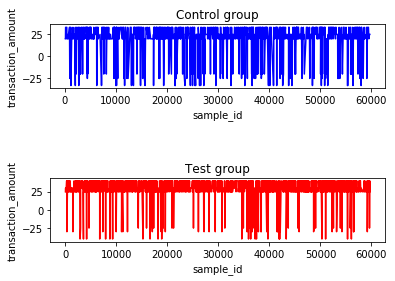

In [70]:
m['transaction_amount'] = m['transaction_amount'].convert_objects(convert_numeric=True)
m['sample_id'] = m['sample_id'].convert_objects(convert_numeric=True)
plt.figure(1)
plt.subplot(311)
plt.title('Control group')
plt.xlabel('sample_id')
plt.ylabel('transaction_amount')
plt.plot(m['sample_id'],  m['transaction_amount'],'b')
n=df[df['sample_id'].notnull() &(df['test_group']=='1')]
n['transaction_amount'] = n['transaction_amount'].convert_objects(convert_numeric=True)
n['sample_id'] = n['sample_id'].convert_objects(convert_numeric=True)
plt.subplot(313)
plt.title('Test group')
plt.xlabel('sample_id')
plt.ylabel('transaction_amount')
plt.plot(n['sample_id'],  n['transaction_amount'],'r')
plt.show()

The positive transaction amounts of test group looks more and higher in contrast to control group which has more negative amounts(refund and chargeback). I would say, the probability of canceling between call-in group is lower. 